In [1]:
# Julia 1.2.0
# Very basic usage of Convex.jl is demonstrated, which can be used to solve Convex Optimization problems
# The package is great at solving problems with convex objective functions and feasible sets that can be represented
# using the "atom" functions available in the library.

In [2]:
#using Pkg
#Pkg.add("Convex")
# We also need to install a solver for Convex to use
#Pkg.add("SCS")

using Convex, SCS
using Random
using Plots

## Linear regression
A very common convex optimization problem is linear regression. Here convex.jl is used to fit a simple linear regression model to data, but we add a constraint to the intercept to show how this can be done. This shows how convex.jl can be useful for regression problems where coefficients are constrained.
### Sample data for simple linear regression

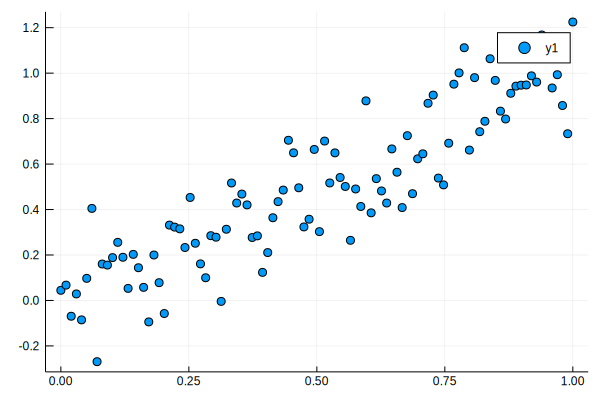

In [3]:
# First we generate linear data with Gaussian noise, for which we need a random number generator.
rng = MersenneTwister(1)

n = 100
x = LinRange(0.0, 1.0, n)
y = x + 0.15*randn(rng, n)
scatter(x, y)

### Solve simple linear regression problem with a constraint
The intercept is constrained to be nonnegative, to demonstrate how constraints can be added. This inequality constraint is linear in the variables, so the feasible set is convex (it is now an open half-space).

----------------------------------------------------------------------------
	SCS v2.0.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2017
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 206, CG tol ~ 1/iter^(2.00)
eps = 1.00e-05, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 20, rho_x = 1.00e-03
Variables n = 5, constraints m = 107
Cones:	primal zero / dual free vars: 1
	linear vars: 2
	soc vars: 104, soc blks: 2
Setup time: 6.18e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 7.27e-01  1.32e+00  8.64e-01 -2.92e+00  3.43e+00  8.33e-15  4.59e-05 
    40| 1.09e-07  1.44e-06  3.89e-07  2.32e+00  2.32e+00  5.28e-15  3.22e-04 
--------------------------------------

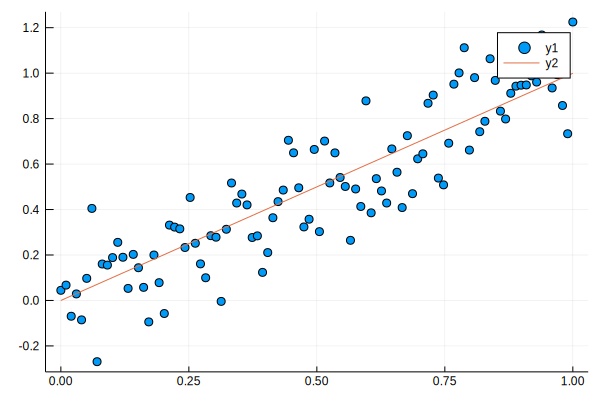

In [4]:
# First define variables that we solve for
intercept = Variable()
beta = Variable()
# Define the objective function
objective = sumsquares(intercept + beta*x - y)
# Define constraints for our problem
constraints = [intercept >= 0]
# Define the convex.jl problem by specifying that we want to minimize the objective subject to the constraints
problem = minimize(objective, constraints)

solve!(problem, SCSSolver()) # Solve using the SCS Solver
# Plot the data with the line we found. The solution values are stored in the variables value attribute.
scatter(x, y) 
y_line = x*beta.value + fill(intercept.value, n)
plot!(x, y_line)